# **Création de la base de bonnées :**

In [ ]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from BF_algo import *
import random

### **Fonction pour générer nos signaux :**

In [ ]:
def signal_genere(A, T, fs, f0): # fonction qui gener un sinus multiplié par la fenetre de hanning
     
    N = int(T*fs)

    t = np.linspace(0, T-1/fs, N)
    signal = A*np.sin(2*np.pi*f0*t) * np.hanning(N)
    
    return signal

In [ ]:
def random_freq(): # fonction pour retirer une frèquece aléatoire
    fmin=2400
    c=340
    fmax=int(c/(0.06*2))
    return random.randint(fmin, fmax)

def get_1fSignal(A, T, fs,f0): # fonction pour generer un signal avec une seule frèquence 

    #f0=random_freq()
    N_pulse = int(T*fs)
    dt = 1./fs
    s = signal_genere(A, T, fs, f0) 
    return s

def get_2fSignal(A, T, fs,f0):  # fonction pour generer un signal avec une 2 frèquence 

    f1=2*f0
    s = get_1fSignal(A, T, fs,f0) + get_1fSignal(A, T, fs,f1)
    return s

def get_3fSignal(A, T, fs,f0): # fonction pour generer un signal avec une 3 frèquence 

    f1=1.5*f0
    f2=2*f0  
    s = get_1fSignal(A, T, fs, f0) + get_1fSignal(A, T, fs, f1) + get_1fSignal(A, T, fs,f2)
    return s

### **Fixer les parametres :**

In [ ]:
fs = 48e3       # frèquence d'échantillonnage [Hz]
T = 1024/fs     # Points temporelle 
A=0.5           # Amplitude  
c0 = 340        # vitesse du son
t = np.linspace(0, T- 1./fs , int(T*fs) ) # vecteur temps pour la representation
T_pulse = 0.01   
f0 = 1000           # fréquence du signal 
L = 0.36   #  Distance entre microphone
M = 7      # nombre de microphone

Antenne = Antenne(L, M)  # Architecture de l'antenne 

### **Generation d'un signal source :** 

(480,)

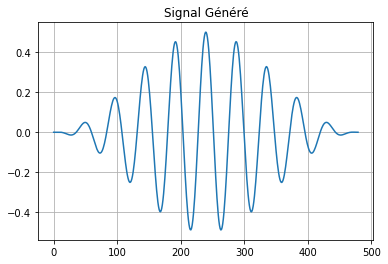

In [ ]:
x_signal = signal_genere(A, T_pulse, fs,f0) 

plt.grid()
plt.title('Signal Généré')
plt.plot(x_signal)
np.shape(x_signal)

### **Signaux récuperer par microphones :**

(7, 1024)

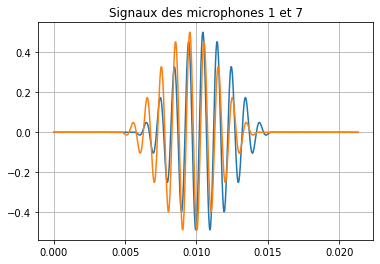

In [ ]:
theta = 30         # angle de la source 
SNR_dB = 60        # rapport signal bruit 
t_initial = 0.005  # temps de commencement du signal 


# Générer les signaux du microphones 
mat_signaux = creer_signals_antenne(Antenne, x_signal, t_initial, T, theta, fs,c0, SNR_dB) 
plt.grid()

plt.title('Signaux des microphones 1 et 7')
plt.plot(t,mat_signaux[0])
plt.plot(t,mat_signaux[6])

np.shape(mat_signaux)

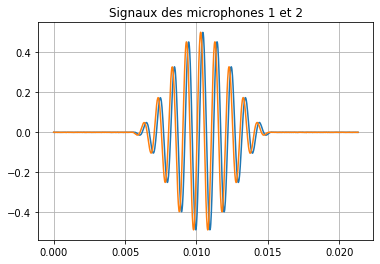

In [ ]:
plt.title('Signaux des microphones 1 et 2')
plt.plot(t,mat_signaux[0])
plt.plot(t,mat_signaux[1])
plt.grid()

# **Boucle pour génerer la base de données :**

In [ ]:
Database=[] # Base de données de nos signaux 
Label=[]    # Labeliser les signaux 
compte =451
y=0
for i in range(0,1800):
  i=i/10
  theta = i

  compte=compte-1
  if (compte==0):
    y=y+1
    compte=450
  
  f0=400

  for i in range(0,4):

    choix= random.randint(1,3)

    choix_fre= random.randint(1,3)

    if (choix_fre==1):
      f0=400

    if (choix_fre==2):
      f0=1000

    if (choix_fre==3):
      f0=1500 

    if (choix==1):
      x_signal= get_1fSignal(A, T_pulse, fs,f0)

    if (choix==2):
      x_signal= get_2fSignal(A, T_pulse, fs, f0)

    if (choix==3):
      x_signal= get_3fSignal(A, T_pulse, fs, f0)



    mat_signaux = creer_signals_antenne(Antenne, x_signal, t_initial, T, theta, fs,c0, SNR_dB)
  
    Database.append(mat_signaux)
    Label.append(y)

### **Sauvegarde de données:**

In [ ]:
np.save('Database_bruite.npy', Database)
np.save('Label_bruite.npy', Label)

In [ ]:
#vérification de la taille lors de la récupération

a1 = np.load('Database_bruite.npy')
a2 = np.load('Label_bruite.npy')

print('Taille de la base :',np.shape(a1),'taille des labels :',np.shape(a2))

Taille de la base : (7200, 7, 1024) taille des labels : (7200,)


## **Générer une base de test :**

In [ ]:
Database_test=[]
Label_test=[]
compte =23
y=0
for i in range(0,180,2):
  i=i/10
  theta = i

  compte=compte-1
  if (compte==0):
    y=y+1
    compte=23

  f0=400
  
  x_signal= x_pulse = get_1fSignal(A, T_pulse, fs,f0)

  mat_signaux = creer_signals_antenne(Antenne, x_signal, t_initial, T, theta, fs,c0, SNR_dB)
  
  Database_test.append(mat_signaux)
  Label_test.append(y)

In [ ]:
# véréfication de de la taille et sauvegarde des données

np.save('Database_test.npy', Database_test)
np.save('Label_test.npy', Label_test)

print('Taille de la base :',np.shape(Database_test),'taille des labels :',np.shape(Label_test))

Taille de la base : (90, 7, 1024) taille des labels : (90,)


### **Copier es fichiers sur drive**

In [ ]:
!cp /content/Database_bruite.npy /content/drive/MyDrive/BL_Data/base_f_400
!cp /content/Database_test.npy /content/drive/MyDrive/BL_Data/base_f_400

!cp /content/Label_bruite.npy /content/drive/MyDrive/BL_Data/base_f_400
!cp /content/Label_test.npy /content/drive/MyDrive/BL_Data/base_f_400

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
